##  Given customer database from a store which has both customer data, determine if the store should focus on website or app development to increase revenue. Provide any other insight possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the customers Database using pandas

In [2]:
customers=pd.read_csv('Ecommerce Customers')

# Basic information on the Data read

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Analysis

## Joint plot on yearly amount spent vs time on website

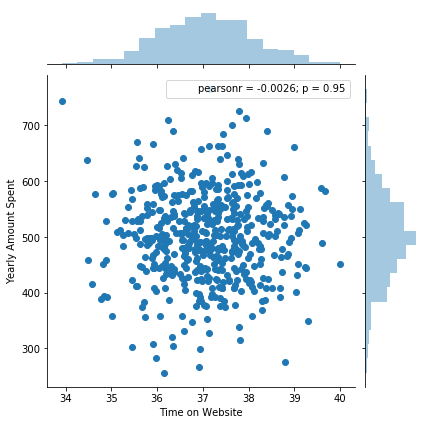

In [6]:
sns.jointplot(x=customers['Time on Website'],y=customers['Yearly Amount Spent'],data=customers)

## Joint plot yearly amount spent vs time on app

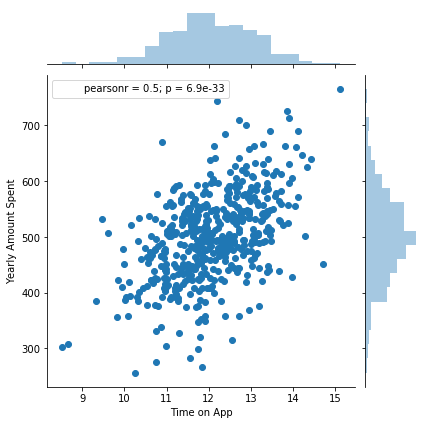

In [7]:
sns.jointplot(x=customers['Time on App'],y=customers['Yearly Amount Spent'])

### initial scatter plots indicate same revenue at lower time for app. Apps look to have quicker conversion rates.

## Joint plot  Length of membership vs Time on app

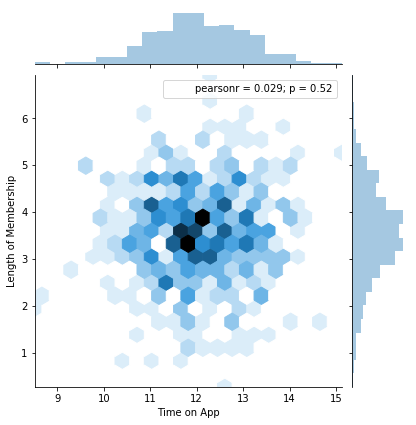

In [8]:
sns.jointplot(x=customers['Time on App'],y=customers['Length of Membership'],kind='hex')

## Pair plots

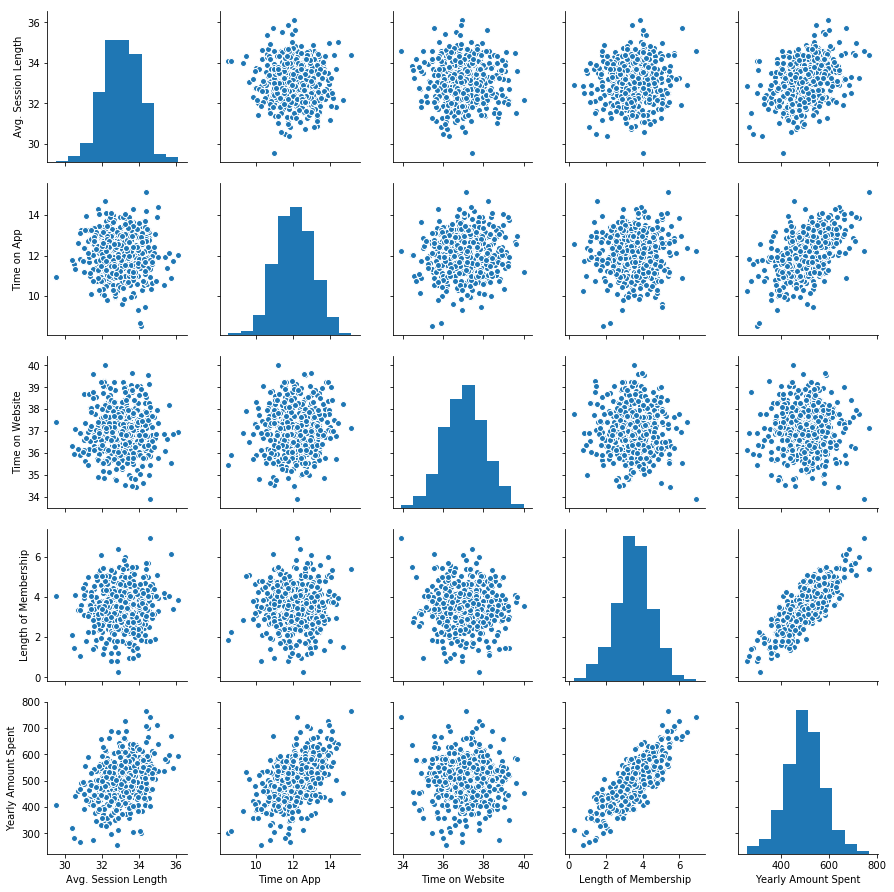

In [9]:
sns.pairplot(customers)

#### Most correlated value to yearly amount spent is length of membership. Time spent on app seems to be somewhat coorelated.

#### Lmplot of yearly amount spent vs length of membership

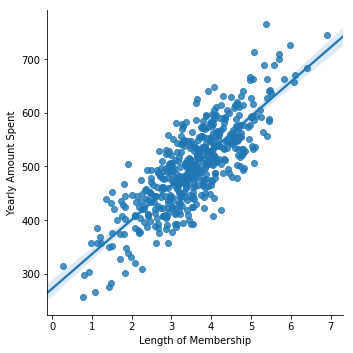

In [10]:
sns.lmplot(y='Yearly Amount Spent',x='Length of Membership',data=customers)

In [11]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X=customers[[ 'Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

### Train test split

In [13]:
from sklearn.cross_validation import train_test_split

C:\Users\anoop\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

### Training the model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

### Predictions based on trained model

In [19]:
predictions=lm.predict(X_test)

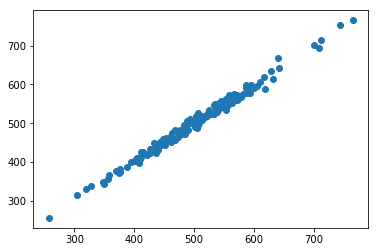

In [20]:
plt.scatter(y_test,predictions)


### Good fit seen between predicted and known values

#### Model evealuation

In [21]:
from sklearn import metrics

MAE=metrics.mean_absolute_error(y_test,predictions)
MSE=metrics.mean_squared_error(y_test,predictions)
RMSE=np.sqrt(MSE)

print('MAE =',MAE)
print('MSE =',MSE)
print('RMSE =',RMSE)

MAE = 7.22814865343
MSE = 79.813051651
RMSE = 8.93381506698


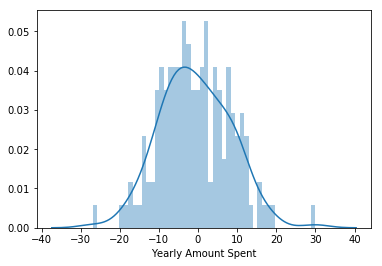

In [22]:
sns.distplot(y_test-predictions,bins=50)

In [23]:
values=pd.DataFrame(lm.coef_,X.columns)

In [24]:
values

,0
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Conclusion

### The amount of yearly amount spends depends more on the membership length. Coefficients show that more tie spent on app significatntly increases amount spent. However it needs to be seen if long time customers spend more time on app or website.
